In [97]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [106]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [107]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [151]:
block_size = 3
def build_dataset(words):
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)

      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [60]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [139]:
g = torch.Generator().manual_seed(2147483647)
# 27 chars 2 dimentional embedding
C = torch.randn((27,10), generator=g)

W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)

W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C,W1,b1,W2,b2]

In [140]:
sum(p.nelement() for p in parameters)

11897

In [141]:
for p in parameters:
  p.requires_grad = True

In [121]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [142]:
lri = []
lossi = []
stepi = []

In [144]:
for i in range(200000):
  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32,),generator=g)

  # forward pass
  emb = C[Xtr[ix]] # [32, 3, 10]

  # layer
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # [32, 100]

  logits = h @ W2 + b2  # [32, 27]
  loss = F.cross_entropy(logits, Ytr[ix])

  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 10000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track learning rate
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

In [145]:
loss.item()

2.575330972671509

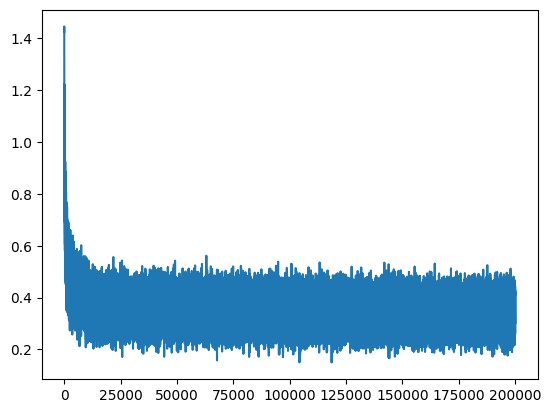

In [146]:
plt.plot(stepi, lossi)

In [149]:
# forward pass
emb = C[Xdev] # [32, 3, 2]

# layer
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # [32, 100]

logits = h @ W2 + b2  # [32, 27]
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2434, grad_fn=<NllLossBackward0>)

In [150]:
# forward pass
emb = C[Xte] # [32, 3, 2]

# layer
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # [32, 100]

logits = h @ W2 + b2  # [32, 27]
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.2508, grad_fn=<NllLossBackward0>)

In [164]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])] # (1, block_size, embedding dimensions)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)

    probs
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))



mora.
kayah.
seel.
nihah.
lore.
masiendrlee.
aderedieliighlynne.
leigh.
esmanar.
katyyah.
karin.
shravrishiriel.
kindrenelinn.
terofi.
brey.
dariyah.
fael.
yuma.
mustella.
hil.
